In [2]:
import warnings
warnings.filterwarnings('ignore')

# New Section

In [3]:
!wget https://www.dropbox.com/s/jztol5j7hvm2w96/brain_tumor%20data%20set.zip

!unzip "/content/brain_tumor data set.zip"


--2024-04-24 17:35:56--  https://www.dropbox.com/s/jztol5j7hvm2w96/brain_tumor%20data%20set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/jztol5j7hvm2w96/brain_tumor%20data%20set.zip [following]
--2024-04-24 17:35:57--  https://www.dropbox.com/s/raw/jztol5j7hvm2w96/brain_tumor%20data%20set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucedddd885b6e0dc9e4069e45b7b.dl.dropboxusercontent.com/cd/0/inline/CRq172vgTJuMiMCRzHoNURzxglvnEDcy4SHpkXeINrbRthIYdYnwsEWNe_R6MrTArXMAGURND9yQ235XBptLpTj1B9rUCV6IC9MdGcBV1biWsqkGTs_atHrDSFcZ_rMmmF21zsq-xaY9uQJuV5iA6vAv/file# [following]
--2024-04-24 17:35:57--  https://ucedddd885b6e0dc9e4069e45b7b.dl.dropboxusercontent.com/cd/0/inline/CRq172vgTJuMiMCRzHoNURzxglvnEDcy4SHpkXeINrbRthIYdYnwsE

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import shutil
import math
import imutils
import cv2

In [5]:
ROOT_DIR = "/content/Brain Tumor Data Set"
num_of_images = {}
for dir in os.listdir(ROOT_DIR):
  num_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

num_of_images

{'Healthey': 2087, 'Brain Tumor': 2513}

In [6]:
# 70% for Train Data
# 15% for Validation
# 15% for testing

In [7]:
# we create a training folder
if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./train/"+ dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)),
                                size = (math.floor(70/100*num_of_images[dir])- 5), replace = False):

      O = os.path.join(ROOT_DIR, dir, img)
      D = os.path.join('./train', dir)
      shutil.copy(O,D)
      os.remove(O)

  else:
    print("Train Folder exists")

Train Folder exists


In [8]:
# we create a validation folder
if not os.path.exists("./val"):
  os.mkdir("./val")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./val/"+ dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)),
                                size = (math.floor(15/100*num_of_images[dir])- 5), replace = False):

      O = os.path.join(ROOT_DIR, dir, img)
      D = os.path.join('./val', dir)
      shutil.copy(O,D)
      os.remove(O)

  else:
    print("Train Folder exists")

Train Folder exists


In [9]:
# we create a validation folder
if not os.path.exists("./test"):
  os.mkdir("./test")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./test/"+ dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)),
                                size = (math.floor(15/100*num_of_images[dir])- 5), replace = False):

      O = os.path.join(ROOT_DIR, dir, img)
      D = os.path.join('./test', dir)
      shutil.copy(O,D)
      os.remove(O)

  else:
    print("Train Folder exists")

Train Folder exists


In [10]:
#Let now build our model
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization
from keras.models import Sequential
from keras.preprocessing import image
import keras

In [11]:
#CNN model

model = Sequential()
model.add(Conv2D(filters=16, kernel_size= (3,3), activation = 'relu', input_shape= (224, 224, 3)))

model.add(Conv2D(filters=32, kernel_size = (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size = (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size = (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))

model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))


model.compile(loss = keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [12]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,  # Scale pixel values to [0, 1]
    shear_range=0.2,  # Apply random shearing
    zoom_range=0.2,  # Apply random zooming
    horizontal_flip=True  # Randomly flip images horizontally
)

val_datagen = image.ImageDataGenerator(rescale=1./255)
test_datagen = image.ImageDataGenerator(rescale=1./255)

In [13]:
train_data = train_datagen.flow_from_directory(directory="/content/train", target_size=(224,224), batch_size=32, class_mode='binary')

Found 3209 images belonging to 2 classes.


In [14]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthey': 1}

In [15]:
val_data = train_datagen.flow_from_directory(directory="/content/val", target_size=(224,224), batch_size=32, class_mode='binary')

Found 679 images belonging to 2 classes.


In [16]:
test_data = train_datagen.flow_from_directory(directory="/content/test", target_size=(224,224), batch_size=32, class_mode='binary')

Found 679 images belonging to 2 classes.


In [17]:
#having early stopping and model check point

from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define early stopping callback
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience=5, verbose=1, mode='auto')  # Monitor validation accuracy

# Define model checkpoint callback
mc = ModelCheckpoint(
    filepath='best_model.hdf5',  # Filepath to save the model
    monitor='val_loss',  # Monitor validation loss (lower is better)
    verbose = 1,
    save_best_only=True,  # Save only the best model based on the monitored metric
    mode='auto',
)

#putting call back in a list
call_back = [es, mc]

In [18]:
# Train the model using fit_generator
hits  = model.fit_generator(generator=train_data,
                    steps_per_epoch=8,  # Automatic steps calculation
                    epochs=30, verbose =1,
                    validation_data=val_data,  # Optional validation data
                    validation_steps=25 , # Optional validation steps
                    callbacks = call_back
                    )

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.7113 - accuracy: 0.5156


Epoch 1: val_loss improved from inf to 0.69137, saving model to best_model.hdf5
8/8 [==============================] - 95s 12s/step - loss: 0.7113 - accuracy: 0.5156 - val_loss: 0.6914 - val_accuracy: 0.4757
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.6573 - accuracy: 0.6328

8/8 [==============================] - 43s 5s/step - loss: 0.6573 - accuracy: 0.6328
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.6617 - accuracy: 0.5977

8/8 [==============================] - 43s 5s/step - loss: 0.6617 - accuracy: 0.5977
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.6492 - accuracy: 0.6289

8/8 [==============================] - 43s 5s/step - loss: 0.6492 - accuracy: 0.6289
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 0.6348 - accuracy: 0.6641

8/8 [==============================] - 43s 5s/step - loss: 0.6348 - accuracy: 0.6641
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 0.5824 - accuracy: 0.7070

8/8 [==============================] - 43s 5s/step - loss: 0.5824 - accuracy: 0.7070
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 0.5906 - accuracy: 0.7124

8/8 [==============================] - 38s 5s/step - loss: 0.5906 - accuracy: 0.7124
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 0.6128 - accuracy: 0.6719

8/8 [==============================] - 43s 5s/step - loss: 0.6128 - accuracy: 0.6719
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 0.5763 - accuracy: 0.7344

8/8 [==============================] - 52s 7s/step - loss: 0.5763 - accuracy: 0.7344
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 0.5591 - accuracy: 0.7188

8/8 [==============================] - 43s 5s/step - loss: 0.5591 - accuracy: 0.7188
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 0.5506 - accuracy: 0.7266

8/8 [==============================] - 43s 5s/step - loss: 0.5506 - accuracy: 0.7266
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 0.5200 - accuracy: 0.7344

8/8 [==============================] - 43s 5s/step - loss: 0.5200 - accuracy: 0.7344
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 0.4935 - accuracy: 0.7597

8/8 [==============================] - 39s 5s/step - loss: 0.4935 - accuracy: 0.7597
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 0.5154 - accuracy: 0.7734

8/8 [==============================] - 43s 5s/step - loss: 0.5154 - accuracy: 0.7734
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 0.4427 - accuracy: 0.8125

8/8 [==============================] - 43s 5s/step - loss: 0.4427 - accuracy: 0.8125
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 0.5220 - accuracy: 0.7695

8/8 [==============================] - 44s 5s/step - loss: 0.5220 - accuracy: 0.7695
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 0.5432 - accuracy: 0.7344

8/8 [==============================] - 44s 5s/step - loss: 0.5432 - accuracy: 0.7344
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 0.5250 - accuracy: 0.7344

8/8 [==============================] - 43s 5s/step - loss: 0.5250 - accuracy: 0.7344
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 0.4864 - accuracy: 0.7539

8/8 [==============================] - 53s 6s/step - loss: 0.4864 - accuracy: 0.7539
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 0.4769 - accuracy: 0.7852

8/8 [==============================] - 44s 5s/step - loss: 0.4769 - accuracy: 0.7852
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 0.5029 - accuracy: 0.7812

8/8 [==============================] - 44s 5s/step - loss: 0.5029 - accuracy: 0.7812
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 0.4465 - accuracy: 0.7852

8/8 [==============================] - 43s 5s/step - loss: 0.4465 - accuracy: 0.7852
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 0.4222 - accuracy: 0.7930

8/8 [==============================] - 43s 5s/step - loss: 0.4222 - accuracy: 0.7930
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 0.4726 - accuracy: 0.7695

8/8 [==============================] - 43s 5s/step - loss: 0.4726 - accuracy: 0.7695
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 0.4087 - accuracy: 0.8086

8/8 [==============================] - 42s 5s/step - loss: 0.4087 - accuracy: 0.8086
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 0.3995 - accuracy: 0.8438

8/8 [==============================] - 43s 5s/step - loss: 0.3995 - accuracy: 0.8438
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 0.4788 - accuracy: 0.7852

8/8 [==============================] - 43s 5s/step - loss: 0.4788 - accuracy: 0.7852
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 0.4372 - accuracy: 0.8164

8/8 [==============================] - 48s 6s/step - loss: 0.4372 - accuracy: 0.8164
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 0.4314 - accuracy: 0.8164

8/8 [==============================] - 46s 5s/step - loss: 0.4314 - accuracy: 0.8164
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 0.4423 - accuracy: 0.8086

8/8 [==============================] - 43s 5s/step - loss: 0.4423 - accuracy: 0.8086


In [19]:
acc = model.evaluate_generator(generator=test_data)[1]
print(f"The accuracy of your model is = {acc*100}%")

The accuracy of your model is = 82.76877999305725%


In [20]:
h  = hits.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

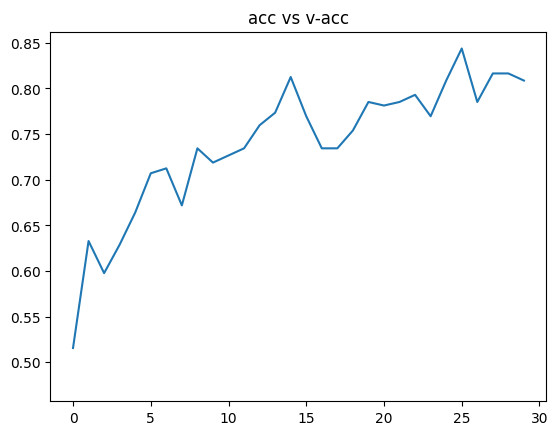

In [21]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c= 'red')
plt.title('acc vs v-acc')
plt.show()

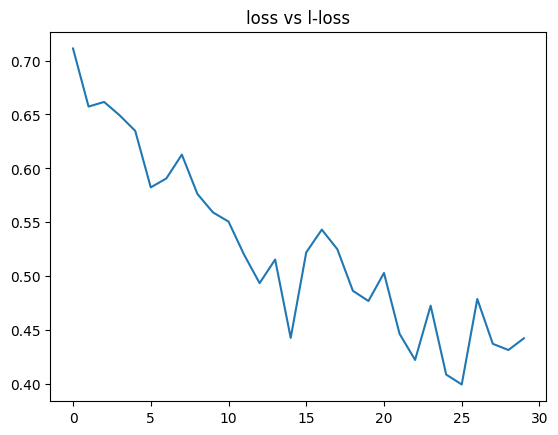

In [22]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c='red')
plt.title('loss vs l-loss')
plt.show()

In [27]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

path = '/content/Brain Tumor Data Set/Healthey/Not Cancer  (1699).jpg'
img = load_img(path, target_size=(224, 224))

i = img_to_array(img) / 255
input_arr = np.array([i])
print(input_arr.shape)

# Assuming `model` is already loaded with your pre-trained model

pred = model.predict(input_arr)[0][0]
print(pred)

if pred < 0.5:
    print("The MRI image is of Brain Tumor")
else:
    print("The MRI image is of Healthy Brain")


(1, 224, 224, 3)
1/1 [==============================] - 0s 98ms/step
0.78832287
The MRI image is of Healthy Brain


In [28]:

import tensorflow as tf
from tensorflow.keras.models import save_model

save_model(model, 'my_model2.hdf5')


In [30]:
%%writefile app.py
import streamlit as st
import tensorflow as tf

st.set_option('deprecation.showfileuploaderEncoding', False)
@st.cache(allow_output_mutation=True)
def load_model():
  model = tf.keras.models.load_model('/content/best_model.hdf5')
  return model

model = load_model()

st.write("""
        # Brain Tumor Detection
        """)

file = st.file_uploader("Please uploaded a brain image", type=['jpg', 'png'])
import cv2
from PIL import Image, ImageOps

def import_and_predict(image_data, model):
  size = (180, 180)
  image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
  img = np.asarray(image)
   prediction = model.predict(img_reshape)

  return prediction

if file is None:
  st.text("Please upload an image file")
else:
  image = Image.open(file)
  st.image(image, use_column_width = True)
  predictions = import_and_predict(image, model)
  class_names = ['Brain Tumor', 'Healthey']
  print("The MRI image is of " + class_names[np.argmax(predictions)])
  st.sucess(string)



Overwriting app.py
